# Music Genre Preferences in Slovakian Youth

## Data Preparation

First, import the necessary libraries for data analysis.

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Then, import the .csv file of our dataset. Note that in this case, I do not use the original kaggle dataset (https://www.kaggle.com/miroslavsabo/young-people-survey). Instead, I use my dataset with only the columns I'm interested in. This makes visualisation neater, and trims out unnecessary information.

In [80]:
df = pd.read_csv("./selectedresponses.csv")
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
1,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
2,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,...,20.0,186.0,77.0,1.0,male,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,5.0,2.0,2.0,5.0,3.0,5.0,2.0,...,19.0,174.0,60.0,3.0,female,right handed,secondary school,no,city,block of flats
4,5.0,3.0,3.0,2.0,1.0,2.0,3.0,4.0,3.0,2.0,...,19.0,175.0,60.0,2.0,female,left handed,secondary school,no,city,block of flats


## Cleaning Data

From experience in Excel, I already know that there are many null values scattered around this giant dataset. To be exact, here's how many:

In [81]:
print(df.isnull().sum())

Music                        3
Slow songs or fast songs     2
Dance                        4
Folk                         5
Country                      5
Classical music              7
Musical                      2
Pop                          3
Rock                         6
Metal or Hardrock            3
Punk                         8
Hiphop, Rap                  4
Reggae, Ska                  7
Swing, Jazz                  6
Rock n roll                  7
Alternative                  7
Latino                       8
Techno, Trance               7
Opera                        1
Musical instruments          1
Happiness in life            4
Energy levels                5
Age                          7
Height                      20
Weight                      20
Number of siblings           6
Gender                       6
Left - right handed          3
Education                    1
Only child                   2
Village - town               4
House - block of flats       4
dtype: i

Let's drop these entries with null values, rename our columns (to help make programming life easier) and re-arrange our dataset.

In [82]:
df.dropna(inplace=True)
df.columns = df.columns.str.replace('-', '').str.replace(',', '').str.replace(' ', '').str.lower()
df.reset_index(drop=True,inplace=True)
df.loc[:,'music':'numberofsiblings'] = df.loc[:,'music':'numberofsiblings'].astype(np.int64)
print(df.shape) # prints the number of rows r and columns c in (r, c) format

(882, 32)


A more elaborate way of showing the dataframe info:

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   music                 882 non-null    int64 
 1   slowsongsorfastsongs  882 non-null    int64 
 2   dance                 882 non-null    int64 
 3   folk                  882 non-null    int64 
 4   country               882 non-null    int64 
 5   classicalmusic        882 non-null    int64 
 6   musical               882 non-null    int64 
 7   pop                   882 non-null    int64 
 8   rock                  882 non-null    int64 
 9   metalorhardrock       882 non-null    int64 
 10  punk                  882 non-null    int64 
 11  hiphoprap             882 non-null    int64 
 12  reggaeska             882 non-null    int64 
 13  swingjazz             882 non-null    int64 
 14  rocknroll             882 non-null    int64 
 15  alternative           882 non-null    in

Using Pandas' corr() method, we can already get the correlation values between each variable. However, we realise that those columns which values are stored as objects, such as Gender, Education, etc.. are ommitted. Correlation values can only be calculated using numerical values! Let's take a peek at the INCORRECT dataframe:

In [84]:
df.corr().head(4)

,music,slowsongsorfastsongs,dance,folk,country,classicalmusic,musical,pop,rock,metalorhardrock,...,latino,technotrance,opera,musicalinstruments,happinessinlife,energylevels,age,height,weight,numberofsiblings
music,1.000000,0.112902,0.084053,0.044268,0.002120,0.079128,0.062795,0.074637,0.159281,0.020023,...,0.033916,0.068135,0.026338,0.098421,0.044215,0.047029,-0.078459,-0.071717,-0.108944,-0.021550
slowsongsorfastsongs,0.112902,1.000000,0.157065,-0.086473,-0.097388,-0.154955,-0.092237,0.027875,0.012638,0.063585,...,-0.044983,0.183798,-0.170740,-0.060954,0.051649,0.077040,0.018964,0.094385,0.122586,-0.008074
dance,0.084053,0.157065,1.000000,0.067645,0.049791,-0.086786,0.082966,0.432071,-0.116497,-0.244965,...,0.296039,0.432234,-0.073636,-0.062170,0.140980,0.156226,0.030650,-0.016197,-0.002608,0.014794
folk,0.044268,-0.086473,0.067645,1.000000,0.401440,0.375488,0.269592,0.015450,0.071968,0.062066,...,0.258203,-0.041376,0.374297,0.264005,0.079397,0.018730,0.149750,-0.063571,-0.020019,0.095164


Let's first assign numerical values to the text columns using Pandas' factorize() method.

In [85]:
df['gender'] = pd.factorize(df.gender)[0]
df['leftrighthanded'] = pd.factorize(df.leftrighthanded)[0]
df['onlychild'] = pd.factorize(df.onlychild)[0]
df['villagetown'] = pd.factorize(df.villagetown)[0]
df['houseblockofflats'] = pd.factorize(df.houseblockofflats)[0]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   music                 882 non-null    int64 
 1   slowsongsorfastsongs  882 non-null    int64 
 2   dance                 882 non-null    int64 
 3   folk                  882 non-null    int64 
 4   country               882 non-null    int64 
 5   classicalmusic        882 non-null    int64 
 6   musical               882 non-null    int64 
 7   pop                   882 non-null    int64 
 8   rock                  882 non-null    int64 
 9   metalorhardrock       882 non-null    int64 
 10  punk                  882 non-null    int64 
 11  hiphoprap             882 non-null    int64 
 12  reggaeska             882 non-null    int64 
 13  swingjazz             882 non-null    int64 
 14  rocknroll             882 non-null    int64 
 15  alternative           882 non-null    in

In [86]:
df.education.unique()

array(['college/bachelor degree', 'secondary school', 'primary school',
       'masters degree', 'doctorate degree',
       'currently a primary school pupil'], dtype=object)

Since there are multiple categories for the education question, let's assign them an int according to their seniority.

In [87]:
row = len(df.index)
for edu in range(0,row) :
    if df.loc[edu,'education'] == 'currently a primary school pupil' :
        df.loc[edu,'education'] = 0
    elif df.loc[edu,'education'] == 'primary school':
        df.loc[edu,'education'] = 1
    elif df.loc[edu,'education'] == 'secondary school':
        df.loc[edu,'education'] = 2
    elif df.loc[edu,'education'] == 'college/bachelor degree':
        df.loc[edu,'education'] = 3
    elif df.loc[edu,'education'] == 'masters degree':
        df.loc[edu,'education'] = 4
    else :
        df.loc[edu,'education'] = 5
        
df.education = df.education.astype(np.int64)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   music                 882 non-null    int64
 1   slowsongsorfastsongs  882 non-null    int64
 2   dance                 882 non-null    int64
 3   folk                  882 non-null    int64
 4   country               882 non-null    int64
 5   classicalmusic        882 non-null    int64
 6   musical               882 non-null    int64
 7   pop                   882 non-null    int64
 8   rock                  882 non-null    int64
 9   metalorhardrock       882 non-null    int64
 10  punk                  882 non-null    int64
 11  hiphoprap             882 non-null    int64
 12  reggaeska             882 non-null    int64
 13  swingjazz             882 non-null    int64
 14  rocknroll             882 non-null    int64
 15  alternative           882 non-null    int64
 16  latino  

In [89]:
print(df.head(5))

   music  slowsongsorfastsongs  dance  folk  country  classicalmusic  musical  \
0      4                     4      2     1        1               1        2   
1      5                     5      2     2        3               4        5   
2      5                     3      2     3        2               3        3   
3      5                     3      2     5        2               2        5   
4      5                     3      3     2        1               2        3   

   pop  rock  metalorhardrock  ...  age  height  weight  numberofsiblings  \
0    3     5                4  ...   19     163      58                 2   
1    3     5                3  ...   20     176      67                 2   
2    2     5                5  ...   20     186      77                 1   
3    3     5                2  ...   19     174      60                 3   
4    4     3                2  ...   19     175      60                 2   

   gender  leftrighthanded  education  onlychild  

Check that categorisation is in order.

`gender`
0 -> female
1 -> male

`leftrighthanded`
0 -> right handed
1 -> left handed

`onlychild`
0 -> no
1 -> yes

`villagetown`
0 -> city
1 -> village

`houseblockofflats`
0 -> block of flats
1 -> house/bungalow

# Data Processing

In [90]:
df.corr()

,music,slowsongsorfastsongs,dance,folk,country,classicalmusic,musical,pop,rock,metalorhardrock,...,age,height,weight,numberofsiblings,gender,leftrighthanded,education,onlychild,villagetown,houseblockofflats
music,1.000000,0.112902,0.084053,0.044268,0.002120,0.079128,0.062795,0.074637,0.159281,0.020023,...,-0.078459,-0.071717,-0.108944,-0.021550,-0.107991,-0.044911,-0.072804,-0.011796,0.013446,0.001581
slowsongsorfastsongs,0.112902,1.000000,0.157065,-0.086473,-0.097388,-0.154955,-0.092237,0.027875,0.012638,0.063585,...,0.018964,0.094385,0.122586,-0.008074,0.094472,-0.031665,0.003771,-0.043006,0.006053,0.017483
dance,0.084053,0.157065,1.000000,0.067645,0.049791,-0.086786,0.082966,0.432071,-0.116497,-0.244965,...,0.030650,-0.016197,-0.002608,0.014794,-0.054584,-0.026973,0.005730,-0.042215,0.070778,0.069376
folk,0.044268,-0.086473,0.067645,1.000000,0.401440,0.375488,0.269592,0.015450,0.071968,0.062066,...,0.149750,-0.063571,-0.020019,0.095164,-0.053308,0.001754,0.150203,-0.054709,0.121530,0.101987
country,0.002120,-0.097388,0.049791,0.401440,1.000000,0.256754,0.206795,0.000157,0.133944,0.127254,...,0.101524,0.048645,0.088115,0.039625,0.084425,0.032831,0.089142,-0.005338,0.095396,0.058369
classicalmusic,0.079128,-0.154955,-0.086786,0.375488,0.256754,1.000000,0.364753,-0.048299,0.210573,0.182140,...,0.050965,-0.007190,0.015594,0.067638,-0.002597,0.050348,0.097569,-0.014052,0.036815,0.009932
musical,0.062795,-0.092237,0.082966,0.269592,0.206795,0.364753,1.000000,0.212988,0.104786,-0.027478,...,0.040035,-0.212888,-0.149339,0.062098,-0.290581,-0.017493,0.025884,0.012997,0.041342,0.024694
pop,0.074637,0.027875,0.432071,0.015450,0.000157,-0.048299,0.212988,1.000000,-0.010254,-0.289710,...,0.022595,-0.106077,-0.115489,-0.043193,-0.170386,-0.020014,-0.011939,0.002411,0.026246,-0.008895
rock,0.159281,0.012638,-0.116497,0.071968,0.133944,0.210573,0.104786,-0.010254,1.000000,0.531636,...,-0.010071,0.000511,0.011400,-0.027804,0.000136,-0.081290,0.023169,0.006100,0.010895,0.028850
metalorhardrock,0.020023,0.063585,-0.244965,0.062066,0.127254,0.182140,-0.027478,-0.289710,0.531636,1.000000,...,0.002285,0.116191,0.167675,-0.003954,0.166639,-0.029572,0.002264,-0.009482,-0.037689,-0.014978


We have proper correlation values now for all our columns. 

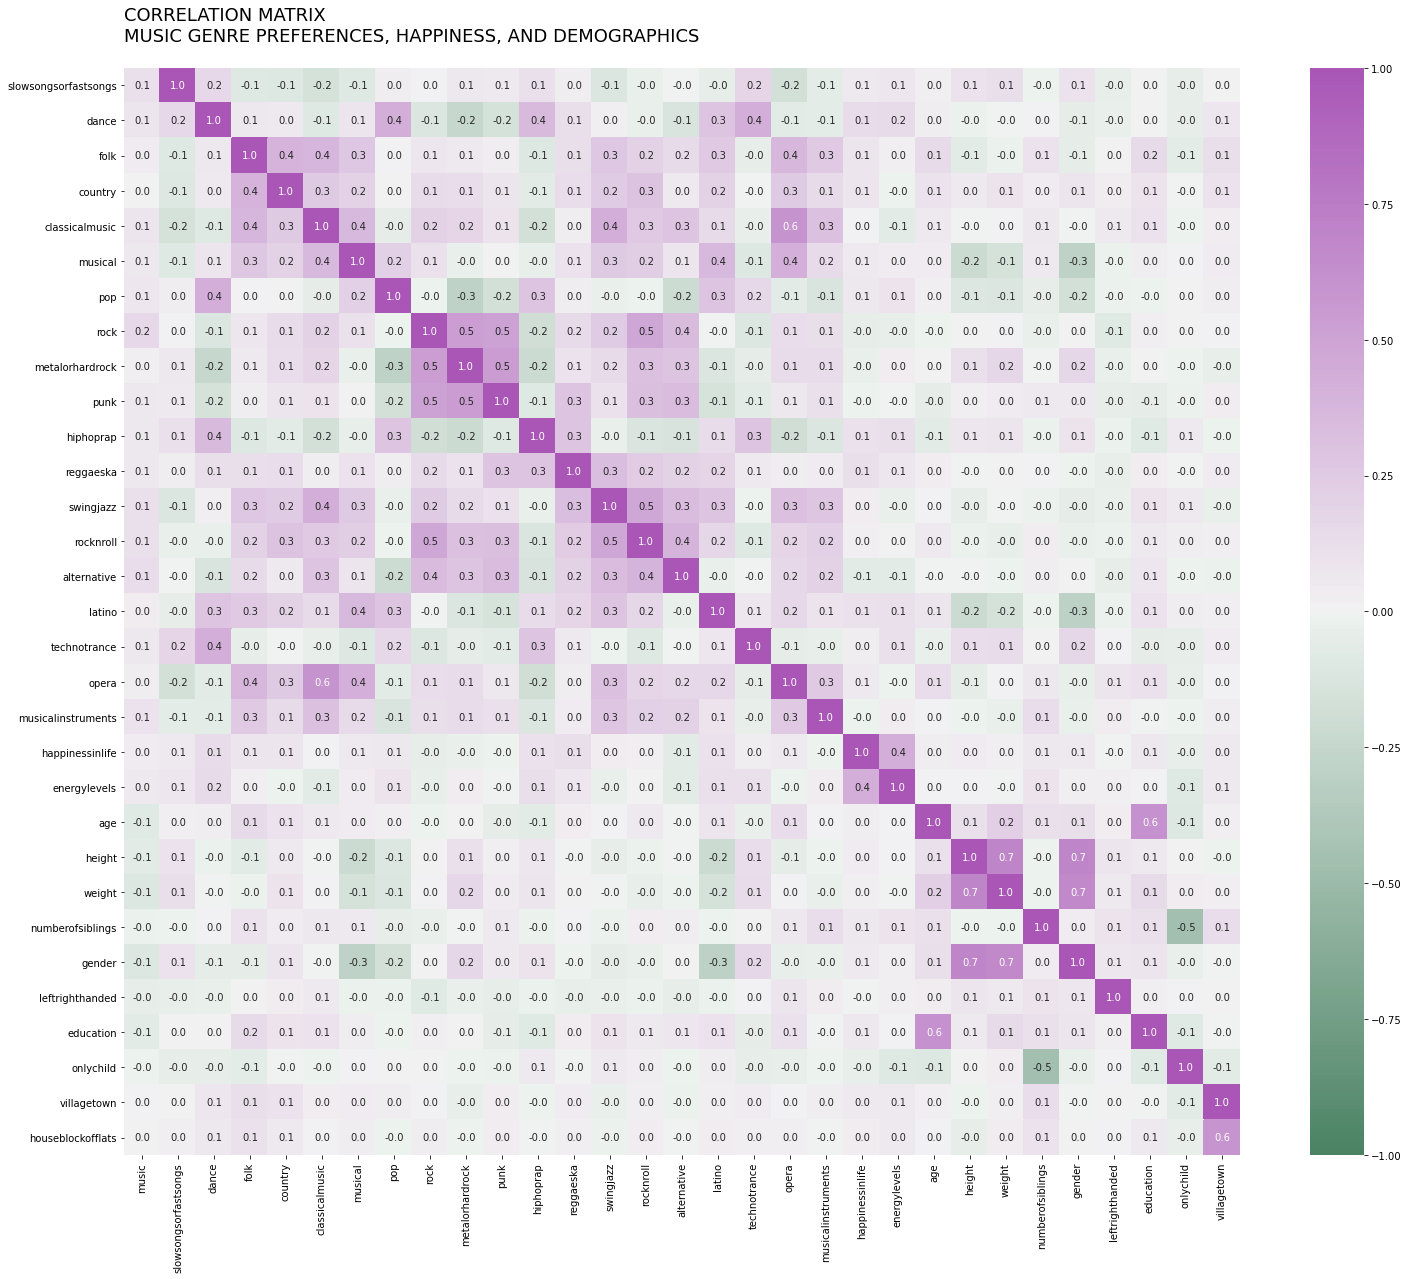

In [117]:
f,ax = plt.subplots(figsize=(25, 20))

# mask
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = df.corr().iloc[1:,:-1].copy()

# color map
cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)

sns.heatmap(corr, vmin = -1.0, vmax = 1.0, cmap=cmap, fmt= '.1f', annot=True,ax=ax)

# set title
title = 'CORRELATION MATRIX\nMUSIC GENRE PREFERENCES, HAPPINESS, AND DEMOGRAPHICS\n'
plt.title(title, loc='left', fontsize=18)

plt.show()